In [168]:
import pandas as pd
import numpy as np
import re
import nltk
import joblib
import keras
#from tensorflow import keras
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

model = keras.models.load_model("jup_enforceability_model.h5")
tokenizer = joblib.load("jup_data_tokenizer.joblib")


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [169]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
SINGLE_LETTERS_RE = re.compile('\s+[a-zA-Z]\s+')
STOPWORDS = set(stopwords.words('english'))
STOPWORDS.remove('should')
STOPWORDS.add('applicant')
STOPWORDS.add('proponent')
STOPWORDS.add('groundwater')
STOPWORDS.add('water')
STOPWORDS.add('environment')
STOPWORDS.add('act')
STOPWORDS.add('project')
STOPWORDS.add('creek')


# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 3000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 100


def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
#    text = SINGLE_LETTERS_RE.sub('', text) # remove single letters
#    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwords from text
    return text


In [172]:
tokenizer = joblib.load("jup_data_tokenizer.joblib")
new_sub_header = ['The Proponent shall ensure that all surface water discharges from the site comply with the discharge limits (both volume and quality) set for the project in any EPL. ']

df_new = pd.DataFrame(new_sub_header)
df_new[0] = df_new[0].apply(clean_text)
df_new[0] = df_new[0].str.replace('\d+', '')

pd.set_option('display.max_colwidth', None)
print(str(df_new[0]))


word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

seq = tokenizer.texts_to_sequences(df_new[0].values)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', padded.shape)
print(padded)

pred = model.predict(padded)
labels = ['1', '2', '3', '4', '5']
print(pred, labels[np.argmax(pred)])
es = labels[np.argmax(pred)]

0    shall ensure surface discharges site comply discharge limits volume quality set epl
Name: 0, dtype: object
Found 1006 unique tokens.
Shape of data tensor: (1, 100)
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4 12  8 88 10 19 42 93
  63 13 99 37]]
[[7.1432689e-05 9.2330207e-05 7.8713972e-05 1.0271251e-04 9.9965477e-01]] 5


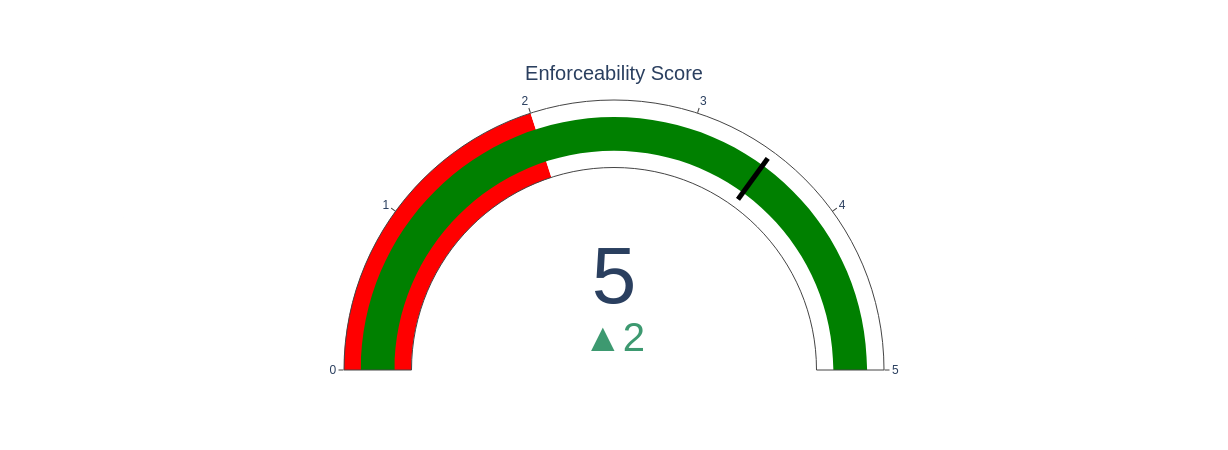

In [173]:
import plotly
from plotly.offline import iplot
import plotly.graph_objects as go
fig = go.Figure(go.Indicator(
    domain = {'x': [0, 1], 'y': [0, 1]},
    value = int(es),
    mode = "gauge+number+delta",
    title = {'text': "Enforceability Score"},
    delta = {'reference': 3},
    gauge = {'axis': {'range': [None, 5]},
             'steps' : [
                 {'range': [0, 2], 'color': "red"},
                 {'range': [2, 4], 'color': "white"},
                 {'range': [4, 5], 'color': "white"}],
             'threshold' : {'line': {'color': "black", 'width': 5}, 'thickness': 0.75, 'value': 3.5}}))


#iplot(fig)
#fig.show()
fig.show()


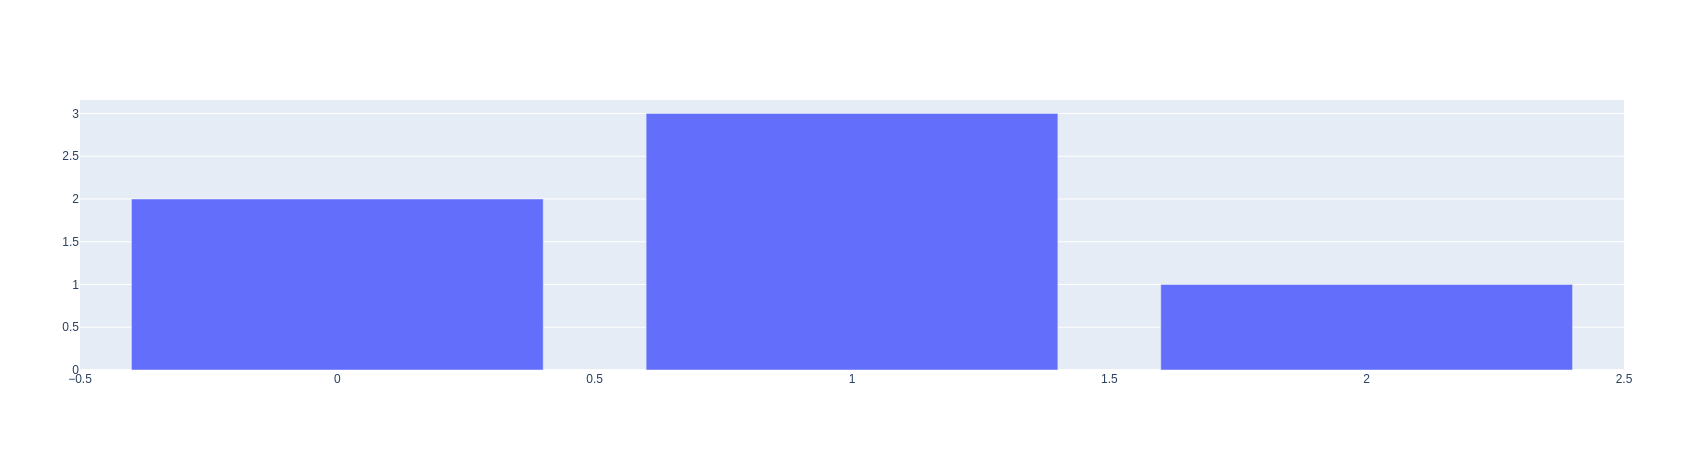

In [165]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
fig.show()

In [105]:
new_sub_header = ['The Proponent must ensure that all surface water discharges from the site comply with the discharge limits set for the project in any EPL']
print(new_sub_header)
df_new = pd.DataFrame(new_sub_header)
df_new[0] = df_new[0].apply(clean_text)
df_new[0] = df_new[0].str.replace('\d+', '')

pd.set_option('display.max_colwidth', None)
print(str(df_new[0]))

seq = tokenizer.texts_to_sequences(df_new[0].values)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['1', '2', '3', '4', '5']
print(pred, labels[np.argmax(pred)])
es = labels[np.argmax(pred)]

['The Proponent must ensure that all surface water discharges from the site comply with the discharge limits set for the project in any EPL']
0    must ensure surface discharges site comply discharge limits set project epl
Name: 0, dtype: object
[[5.4344808e-04 9.9333775e-01 5.7707774e-03 2.5612491e-04 9.1993119e-05]] 2
